# GL / GM work

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

## Prepare the data

In [8]:
from yamlparser import YAMLParser, read_parameterized_runs

In [9]:
yp = YAMLParser()

In [10]:
# read parameterized runs
exps_param = yp.read('/glade/u/home/noraloose/GL90paper/config_param.yaml')
%time exps_param = read_parameterized_runs(exps_param)

nw2_0.5deg_N15_KHTH800
nw2_0.5deg_N15_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300
nw2_0.25deg_N15_KHGL300_hbbl5
nw2_0.25deg_N15_KHTH800
nw2_0.25deg_N15_KHGL800_hbbl5
nw2_0.125deg_N15_KHTH100
nw2_0.125deg_N15_KHGL100_hbbl5
nw2_0.125deg_N15_KHTH800
nw2_0.125deg_N15_KHGL800_hbbl5
CPU times: user 4.32 s, sys: 667 ms, total: 4.99 s
Wall time: 35.8 s


## Average data over last 2000 days

In [11]:
for exp, v in exps_param.items():
        ds = v['ds']
        dst = ds.mean(dim='time', keep_attrs=True)
        v['dst'] = dst

## Plotting

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 12}
pylab.rcParams.update(params)

In [13]:
import cartopy.crs as ccrs

In [103]:
exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']['label'] = '1/2$^\circ$ GL 800'
exps_param['nw2_0.25deg_N15_KHGL800_hbbl5']['label'] = '1/4$^\circ$ GL 800'
exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']['label'] = '1/4$^\circ$ GL 800'
exps_param['nw2_0.25deg_N15_KHGL300_hbbl5']['label'] = '1/4$^\circ$ GL 300'
exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']['label'] = '1/4$^\circ$ GL 100'


In [119]:
exps_GM = ['nw2_0.5deg_N15_KHTH800', 'nw2_0.25deg_N15_KHTH300', 'nw2_0.125deg_N15_KHTH100']
exps_GL = ['nw2_0.5deg_N15_KHGL800_hbbl5', 'nw2_0.25deg_N15_KHGL300_hbbl5', 'nw2_0.125deg_N15_KHGL100_hbbl5']

with ProgressBar():
    for exp_GM in exps_GM:
        exps_param[exp_GM]['dst']['GMwork'].load()
    for exp_GL in exps_GL:
        exps_param[exp_GL]['dst']['GLwork'].load()

## GM work

In [90]:
import matplotlib as mpl
cmap = mpl.cm.PuBuGn_r
cmap.set_bad('gray')

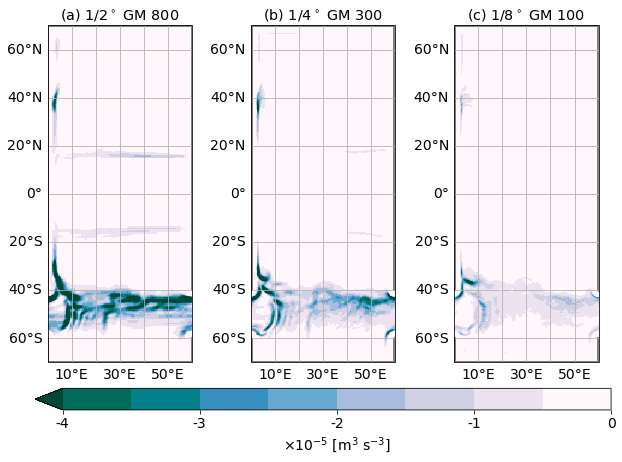

In [127]:
extent = [0, 60, -70, 70]

fig, axs = plt.subplots(1, 3, figsize=(10, 6), subplot_kw={'projection':ccrs.PlateCarree()})

vmax = 0.00004
ticks = [-0.00004, -0.00003, -0.00002, -0.00001, 0]
xticklabels = [-4, -3, -2, -1, 0]

for exp_GM, abc, ax in zip(exps_GM, ['(a)', '(b)', '(c)'], axs):
    
    dst = exps_param[exp_GM]['dst']
    st = exps_param[exp_GM]['st']
    label = exps_param[exp_GM]['label']
    
    GMwork = dst['GMwork'] / 1000  # convert from W m-2 to m3s-3
    
    p = GMwork.where(st.wet).plot(
        ax=ax, 
        vmax=0, vmin=-vmax, cmap=cmap,
        levels=9,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    ax.set_title('%s %s' %(abc, label))

    
for ax in axs:
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.1)
cax = fig.add_axes([0.1, -0.01, 0.8, 0.05])

cb = fig.colorbar(p, cax=cax, orientation='horizontal', extend='min', ticks=ticks)
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]', size=14)
cb.ax.set_xticklabels(xticklabels)

figname = '/glade/u/home/noraloose/GL90paper/figures/GMwork.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

## GL work

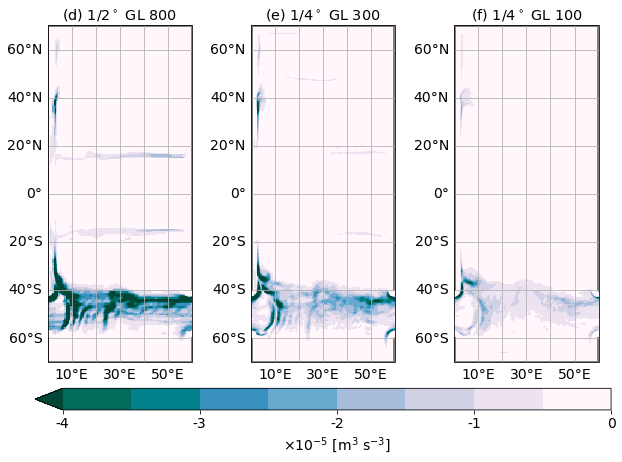

In [128]:
extent = [0, 60, -70, 70]

fig, axs = plt.subplots(1, 3, figsize=(10, 6), subplot_kw={'projection':ccrs.PlateCarree()})

vmax = 0.00004
ticks = [-0.00004, -0.00003, -0.00002, -0.00001, 0]
xticklabels = [-4, -3, -2, -1, 0]

for exp_GL, abc, ax in zip(exps_GL, ['(d)', '(e)', '(f)'], axs):
    
    dst = exps_param[exp_GL]['dst']
    st = exps_param[exp_GL]['st']
    label = exps_param[exp_GL]['label']
    
    GLwork = dst['GLwork'].sum(dim='zl')
    
    p = GLwork.where(st.wet).plot(
        ax=ax, 
        vmax=0, vmin=-vmax, cmap=cmap,
        levels=9,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    ax.set_title('%s %s' %(abc, label))

    
for ax in axs:
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.1)
cax = fig.add_axes([0.1, -0.01, 0.8, 0.05])

cb = fig.colorbar(p, cax=cax, orientation='horizontal', extend='min', ticks=ticks)
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]', size=14)
cb.ax.set_xticklabels(xticklabels)

figname = '/glade/u/home/noraloose/GL90paper/figures/GLwork.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

## Relative difference GL vs GM work

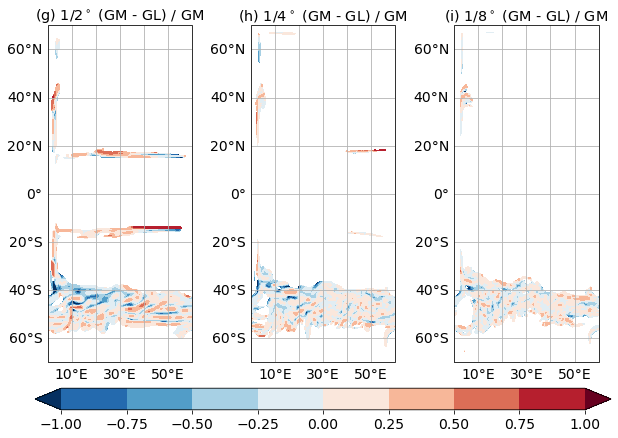

In [131]:
extent = [0, 60, -70, 70]
threshold = 0.5e-5

fig, axs = plt.subplots(1, 3, figsize=(10, 6), subplot_kw={'projection':ccrs.PlateCarree()})

labellist = ['1/2$^\circ$', '1/4$^\circ$', '1/8$^\circ$']
for exp_GM, exp_GL, abc, label, ax in zip(exps_GM, exps_GL, ['(g)', '(h)', '(i)'], labellist, axs):
    
    dst_GM = exps_param[exp_GM]['dst']
    dst_GL = exps_param[exp_GL]['dst']

    st = exps_param[exp_GM]['st']
    
    GMwork = dst_GM['GMwork'] / 1000
    GLwork = dst_GL['GLwork'].sum(dim='zl')

    diff = (GMwork - GLwork) / GMwork

    p = diff.where(st.wet).where(-GMwork > threshold).plot.contourf(
        ax=ax, 
        vmin=-1, vmax=1,
        levels=9,
        extend='both',
        cmap = 'RdBu_r',
        transform=ccrs.PlateCarree(), 
        add_colorbar = False
        )
    ax.set_title('%s %s (GM - GL) / GM' %(abc, label))


for ax in axs:
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.1)
cax = fig.add_axes([0.1, -0.01, 0.8, 0.05])

cb = fig.colorbar(p, cax=cax, orientation='horizontal', extend='both')
cb.ax.tick_params(labelsize=14)

figname = '/glade/u/home/noraloose/GL90paper/figures/GMvsGLwork.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)